# Tarea 3: Recomendación

Tras la segmentación de la base de clientes, tenemos idea de lanzar una campaña a la base de clientes donde se promueva los productos de su mayor interés.
Tenemos presupuesto para enviar 10.000 e-mails a clientes,  donde las ganancias por venta son más bajas en cuentas (10€), medias en ahorro e inversión (40€), y más altas en financiación (60€).

Nuestro objetivo principal sería identificar a los 10.000 clientes con mayor interés en los productos y con el mayor potencial de rentabilidad, maximizando las ganancias.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
df_base=pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Proyecto_Final/df_base3.pkl')

 # Feature engineering

## Merge con cluster

In [ ]:
df_seg_rev=pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Proyecto_Final/df_seg_rev.pkl')

In [ ]:
#Añadir el cluster de la tarea 2 a la base de datos
df_base = df_base.merge(df_seg_rev[['pk_cid', 'hdbscan_cluster']], on='pk_cid', how='left')

In [ ]:
df_base

pk_cid pk_partition entry_date entry_channel  active_customer  \
0        1375586   2018-01-28 2018-01-12           KHL                1   
1        1050611   2018-01-28 2015-08-10           KHE                0   
2        1050612   2018-01-28 2015-08-10           KHE                0   
3        1050613   2018-01-28 2015-08-10           KHD                0   
4        1050614   2018-01-28 2015-08-10           KHE                1   
...          ...          ...        ...           ...              ...   
5962919  1166765   2019-05-28 2016-08-14           KHE                0   
5962920  1166764   2019-05-28 2016-08-14           KHE                0   
5962921  1166763   2019-05-28 2016-08-14           KHE                1   
5962922  1166789   2019-05-28 2016-08-14           KHE                0   
5962923  1550586   2019-05-28 2019-05-13       Unknown                1   

                    segment  short_term_deposit  loans  mortgage  funds  \
0         02 - PARTICULARES                   0      0         0      0   
1        03 - UNIVERSITARIO                   0      0         0      0   
2        03 - UNIVERSITARIO                   0      0         0      0   
3        03 - UNIVERSITARIO                   1      0         0      0   
4        03 - UNIVERSITARIO                   0      0         0      0   
...                     ...                 ...    ...       ...    ...   
5962919  03 - UNIVERSITARIO                   0      0         0      0   
5962920  03 - UNIVERSITARIO                   0      0         0      0   
5962921   02 - PARTICULARES                   0      0         0      0   
5962922  03 - UNIVERSITARIO                   0      0         0      0   
5962923             Unknown                   0      0         0      0   

         securities  long_term_deposit  em_account_pp  credit_card  payroll  \
0                 0                  0              0            0        0   
1                 0                  0              0            0        0   
2                 0                  0              0            0        0   
3                 0                  0              0            0        0   
4                 0                  0              0            0        0   
...             ...                ...            ...          ...      ...   
5962919           0                  0              0            0        0   
5962920           0                  0              0            0        0   
5962921           0                  0              0            0        0   
5962922           0                  0              0            0        0   
5962923           0                  0              0            0        0   

         pension_plan  payroll_account  emc_account  debit_card  em_account_p  \
0                   0                0            0           0             0   
1                   0                0            0           0             0   
2                   0                0            0           0             0   
3                   0                0            0           0             0   
4                   0                0            0           0             0   
...               ...              ...          ...         ...           ...   
5962919             0                0            0           0             0   
5962920             0                0            0           0             0   
5962921             0                0            0           0             0   
5962922             0                0            0           0             0   
5962923             0                0            0           0             0   

         em_acount country_id  region_code  gender  age  deceased  salary  \
0                1         ES           29       1   35         0   87218   
1                1         ES           13       0   23         0   35548   
2                1         ES           13       0   23

In [ ]:
print("Total de valores nulos que hay:", df_base.isnull().sum().sum())
df_base.isna().sum()[df_base.isna().sum() > 0]

Total de valores nulos que hay: 12874


hdbscan_cluster    12874
dtype: int64

Es normal que haya valores nulos en cluster, ya que habíamos filtrado la base de clientes antes de la segmentación.

In [ ]:
df_base[df_base['hdbscan_cluster'].isna()]

pk_cid pk_partition entry_date entry_channel  active_customer  \
1148     1051383   2018-01-28 2015-08-13           KFC                1   
1740     1048803   2018-01-28 2015-08-09           KHE                0   
2022     1050073   2018-01-28 2015-08-10           KAT                1   
3231     1057197   2018-01-28 2015-09-10           KHE                0   
3662     1053264   2018-01-28 2015-08-22           KAT                1   
...          ...          ...        ...           ...              ...   
5961161  1167675   2019-05-28 2016-08-20           KHE                0   
5961554  1167439   2019-05-28 2016-08-19           KAT                1   
5961786  1168237   2019-05-28 2016-08-21           KAT                1   
5961977  1168051   2019-05-28 2016-08-21           KHE                0   
5962655  1167044   2019-05-28 2016-08-16           KFC                0   

                    segment  short_term_deposit  loans  mortgage  funds  \
1148      02 - PARTICULARES                   0      0         0      0   
1740     03 - UNIVERSITARIO                   0      0         0      0   
2022               01 - TOP                   0      0         0      0   
3231     03 - UNIVERSITARIO                   0      0         0      0   
3662      02 - PARTICULARES                   0      0         0      0   
...                     ...                 ...    ...       ...    ...   
5961161  03 - UNIVERSITARIO                   0      0         0      0   
5961554   02 - PARTICULARES                   0      0         0      0   
5961786   02 - PARTICULARES                   0      0         0      0   
5961977  03 - UNIVERSITARIO                   0      0         0      0   
5962655   02 - PARTICULARES                   0      0         0      0   

         securities  long_term_deposit  em_account_pp  credit_card  payroll  \
1148              0                  0              0            0        0   
1740              0                  0              0            0        0   
2022              1                  0              0            0        0   
3231              0                  0              0            0        0   
3662              0                  0              0            0        0   
...             ...                ...            ...          ...      ...   
5961161           0                  0              0            0        0   
5961554           0                  0              0            0        0   
5961786           0                  0              0            0        0   
5961977           0                  0              0            0        0   
5962655           0                  0              0            0        0   

         pension_plan  payroll_account  emc_account  debit_card  em_account_p  \
1148                0                0            0           1             0   
1740                0                0            0           0             0   
2022                0                0            1           1             0   
3231                0                0            0           0             0   
3662                1                1            1           1             0   
...               ...              ...          ...         ...           ...   
5961161             0                0            0           0             0   
5961554             0                0            0           0             0   
5961786             0                0            0           0             0   
5961977             0                0            0           0             0   
5962655             0                0            0           0             0   

         em_acount country_id  region_code  gender  age  deceased   salary  \
1148             0         ES            8       0   53         0  1415413   
1740             1         ES            8       0   26         0  5649552   
2022             1         CA           -1       0  

Decidimos eliminar estos clientes que no tienen un cluster asignado.

In [ ]:
df_base.dropna(subset=['hdbscan_cluster'],inplace=True)

In [ ]:
df_base

pk_cid pk_partition entry_date entry_channel  active_customer  \
0        1375586   2018-01-28 2018-01-12           KHL                1   
1        1050611   2018-01-28 2015-08-10           KHE                0   
2        1050612   2018-01-28 2015-08-10           KHE                0   
3        1050613   2018-01-28 2015-08-10           KHD                0   
4        1050614   2018-01-28 2015-08-10           KHE                1   
...          ...          ...        ...           ...              ...   
5962919  1166765   2019-05-28 2016-08-14           KHE                0   
5962920  1166764   2019-05-28 2016-08-14           KHE                0   
5962921  1166763   2019-05-28 2016-08-14           KHE                1   
5962922  1166789   2019-05-28 2016-08-14           KHE                0   
5962923  1550586   2019-05-28 2019-05-13       Unknown                1   

                    segment  short_term_deposit  loans  mortgage  funds  \
0         02 - PARTICULARES                   0      0         0      0   
1        03 - UNIVERSITARIO                   0      0         0      0   
2        03 - UNIVERSITARIO                   0      0         0      0   
3        03 - UNIVERSITARIO                   1      0         0      0   
4        03 - UNIVERSITARIO                   0      0         0      0   
...                     ...                 ...    ...       ...    ...   
5962919  03 - UNIVERSITARIO                   0      0         0      0   
5962920  03 - UNIVERSITARIO                   0      0         0      0   
5962921   02 - PARTICULARES                   0      0         0      0   
5962922  03 - UNIVERSITARIO                   0      0         0      0   
5962923             Unknown                   0      0         0      0   

         securities  long_term_deposit  em_account_pp  credit_card  payroll  \
0                 0                  0              0            0        0   
1                 0                  0              0            0        0   
2                 0                  0              0            0        0   
3                 0                  0              0            0        0   
4                 0                  0              0            0        0   
...             ...                ...            ...          ...      ...   
5962919           0                  0              0            0        0   
5962920           0                  0              0            0        0   
5962921           0                  0              0            0        0   
5962922           0                  0              0            0        0   
5962923           0                  0              0            0        0   

         pension_plan  payroll_account  emc_account  debit_card  em_account_p  \
0                   0                0            0           0             0   
1                   0                0            0           0             0   
2                   0                0            0           0             0   
3                   0                0            0           0             0   
4                   0                0            0           0             0   
...               ...              ...          ...         ...           ...   
5962919             0                0            0           0             0   
5962920             0                0            0           0             0   
5962921             0                0            0           0             0   
5962922             0                0            0           0             0   
5962923             0                0            0           0             0   

         em_acount country_id  region_code  gender  age  deceased  salary  \
0                1         ES           29       1   35         0   87218   
1                1         ES           13       0   23         0   35548   
2                1         ES           13       0   23

In [ ]:
# df_base.to_pickle('/content/drive/MyDrive/Colab Notebooks/Proyecto_Final/df_base_cluster.pkl')

## Días que lleva activo el cliente

In [ ]:
df_base = df_base.sort_values(by=['pk_cid', 'pk_partition'])

df_base['previous_active'] = df_base.groupby('pk_cid')['active_customer'].shift(fill_value=0)
df_base['previous_partition'] = df_base.groupby('pk_cid')['pk_partition'].shift(fill_value=pd.NaT)
df_base['previous_partition'] = df_base['previous_partition'].fillna(df_base['pk_partition'])
# Calculate days_diff
df_base['days_diff'] = (df_base['pk_partition'] - df_base['previous_partition']).dt.days

# Calculate active_days, ensuring 1 day is counted even if pk_partition is the same as previous_partition
df_base['active_days'] = np.where(
    (df_base['active_customer'] == 1) & (df_base['days_diff'] == 0),  # Condition: Active in partition
    1,  # Value if Condition 1 is True
    df_base['days_diff'].where(df_base['active_customer'].shift(fill_value=0) == 1, 0)  # Otherwise
)

# Calculate inactive_days,
df_base['inactive_days']=np.where(
    (df_base['active_customer'] == 0) & (df_base['days_diff'] == 0),  # Condition: Inactive in partition
    1,
    df_base['days_diff'].where(df_base['active_customer'].shift(fill_value=0) == 0, 0)
)


In [ ]:
# # Cumulate active_days and inactive_days
df_base['active_days'] = df_base.groupby('pk_cid')['active_days'].cumsum()
df_base['inactive_days'] = df_base.groupby('pk_cid')['inactive_days'].cumsum()

#Drop columns
df_base.drop(columns=['previous_active', 'previous_partition', 'days_diff'], inplace=True)

In [ ]:
df_base.reset_index(inplace=True,drop=True)
df_base

pk_cid pk_partition entry_date entry_channel  active_customer  \
0          15891   2018-07-28 2018-07-28           KAT                1   
1          15891   2018-08-28 2018-07-28           KAT                0   
2          16063   2018-11-28 2018-11-19           KAT                1   
3          16063   2018-12-28 2018-11-19           KAT                1   
4          16063   2019-01-28 2018-11-19           KAT                1   
...          ...          ...        ...           ...              ...   
5950045  1553685   2019-05-28 2019-05-31       Unknown                0   
5950046  1553686   2019-05-28 2019-05-31       Unknown                0   
5950047  1553687   2019-05-28 2019-05-31       Unknown                0   
5950048  1553688   2019-05-28 2019-05-31       Unknown                0   
5950049  1553689   2019-05-28 2019-05-31       Unknown                0   

                   segment  short_term_deposit  loans  mortgage  funds  \
0                  Unknown                   0      0         0      0   
1        02 - PARTICULARES                   0      0         0      0   
2                  Unknown                   0      0         0      0   
3        02 - PARTICULARES                   0      0         0      0   
4        02 - PARTICULARES                   0      0         0      0   
...                    ...                 ...    ...       ...    ...   
5950045            Unknown                   0      0         0      0   
5950046            Unknown                   0      0         0      0   
5950047            Unknown                   0      0         0      0   
5950048            Unknown                   0      0         0      0   
5950049            Unknown                   0      0         0      0   

         securities  long_term_deposit  em_account_pp  credit_card  payroll  \
0                 0                  0              0            0        0   
1                 0                  0              0            0        0   
2                 0                  0              0            0        0   
3                 0                  0              0            0        0   
4                 0                  0              0            0        0   
...             ...                ...            ...          ...      ...   
5950045           0                  0              0            0        0   
5950046           0                  0              0            0        0   
5950047           0                  0              0            0        0   
5950048           0                  0              0            0        0   
5950049           0                  0              0            0        0   

         pension_plan  payroll_account  emc_account  debit_card  em_account_p  \
0                   0                0            0           0             0   
1                   0                0            0           0             0   
2                   0                0            0           0             0   
3                   0                0            0           0             0   
4                   0                0            0           0             0   
...               ...              ...          ...         ...           ...   
5950045             0                0            0           0             0   
5950046             0                0            0           0             0   
5950047             0                0            0           0             0   
5950048             0                0            0           0             0   
5950049             0                0            0           0             0   

         em_acount country_id  region_code  gender  age  deceased  salary  \
0                1         ES           28       1   59         0   88654   
1                0         ES           28       1   59         0   88654   
2                0         ES           28       1   62         0  

In [ ]:
df_base[['pk_cid','pk_partition','active_days','inactive_days']]

pk_cid pk_partition  active_days  inactive_days
0          15891   2018-07-28            1              0
1          15891   2018-08-28           32              0
2          16063   2018-11-28            1              0
3          16063   2018-12-28           31              0
4          16063   2019-01-28           62              0
...          ...          ...          ...            ...
5950045  1553685   2019-05-28            0              1
5950046  1553686   2019-05-28            0              1
5950047  1553687   2019-05-28            0              1
5950048  1553688   2019-05-28            0              1
5950049  1553689   2019-05-28            0              1

[5950050 rows x 4 columns]

## Lag

In [ ]:
#Lag del mes pasado
df_base['number_accounts_lag']=df_base.groupby('pk_cid')['number_accounts'].shift(1).fillna(0)
df_base['number_ahorro_inversion_lag']=df_base.groupby('pk_cid')['number_ahorro_inversion'].shift(1).fillna(0)
df_base['number_prestamos_tarjetas_lag']=df_base.groupby('pk_cid')['number_prestamos_tarjetas'].shift(1).fillna(0)

#Definir si va a tener un producto nuevo el siguiente mes
#Cuentas
df_base['number_accounts_nextmonth']=df_base.groupby('pk_cid')['number_accounts'].shift(-1)
df_base['new_account_nextmonth']=np.where(df_base['number_accounts_nextmonth']-df_base['number_accounts']>0,1,0)
#Ahorro inversion
df_base['number_ahorro_inversion_nextmonth']=df_base.groupby('pk_cid')['number_ahorro_inversion'].shift(-1)
df_base['new_ahorro_inversion_nextmonth']=np.where(df_base['number_ahorro_inversion_nextmonth']-df_base['number_ahorro_inversion']>0,1,0)
#Préstamos tarjetas
df_base['number_prestamos_tarjetas_nextmonth']=df_base.groupby('pk_cid')['number_prestamos_tarjetas'].shift(-1)
df_base['new_prestamos_tarjetas_nextmonth']=np.where(df_base['number_prestamos_tarjetas_nextmonth']-df_base['number_prestamos_tarjetas']>0,1,0)

#Definir si va a dar de baja a un producto el siguiente mes
# df_base['total_products_nextmonth']=df_base.groupby('pk_cid')['total_products'].shift(-1)
# df_base['will_drop_product']=np.where(df_base['total_products_nextmonth']-df_base['total_products']<0,1,0)

In [ ]:
#Ejemplo
df_base[df_base['pk_cid']==22212]

pk_cid pk_partition entry_date entry_channel  active_customer  \
307  22212   2018-01-28 2017-09-08           KAT                1   
308  22212   2018-02-28 2017-09-08           KAT                1   
309  22212   2018-03-28 2017-09-08           KAT                1   
310  22212   2018-04-28 2017-09-08           KAT                1   
311  22212   2018-05-28 2017-09-08           KAT                1   
312  22212   2018-06-28 2017-09-08           KAT                1   
313  22212   2018-07-28 2017-09-08           KAT                1   
314  22212   2018-08-28 2017-09-08           KAT                1   
315  22212   2018-09-28 2017-09-08           KAT                1   
316  22212   2018-10-28 2017-09-08           KAT                1   
317  22212   2018-11-28 2017-09-08           KAT                1   
318  22212   2018-12-28 2017-09-08           KAT                1   
319  22212   2019-01-28 2017-09-08           KAT                1   
320  22212   2019-02-28 2017-09-08           KAT                1   
321  22212   2019-03-28 2017-09-08           KAT                1   
322  22212   2019-04-28 2017-09-08           KAT                1   
323  22212   2019-05-28 2017-09-08           KAT                1   

               segment  short_term_deposit  loans  mortgage  funds  \
307  02 - PARTICULARES                   0      0         0      0   
308  02 - PARTICULARES                   0      0         0      0   
309  02 - PARTICULARES                   0      0         0      0   
310  02 - PARTICULARES                   0      0         0      0   
311  02 - PARTICULARES                   0      0         0      0   
312  02 - PARTICULARES                   0      0         0      0   
313  02 - PARTICULARES                   0      0         0      0   
314  02 - PARTICULARES                   0      0         0      0   
315  02 - PARTICULARES                   0      0         0      0   
316  02 - PARTICULARES                   0      0         0      0   
317  02 - PARTICULARES                   0      0         0      0   
318  02 - PARTICULARES                   0      0         0      0   
319  02 - PARTICULARES                   0      0         0      0   
320  02 - PARTICULARES                   0      0         0      0   
321  02 - PARTICULARES                   0      0         0      0   
322  02 - PARTICULARES                   0      0         0      0   
323  02 - PARTICULARES                   0      0         0      0   

     securities  long_term_deposit  em_account_pp  credit_card  payroll  \
307           0                  0              0            0        0   
308           0                  0              0            0        0   
309           0                  0              0            0        0   
310           0                  0              0            0        0   
311           0                  0              0            0        0   
312           0                  0              0            0        0   
313           0                  0              0            0        0   
314           0                  0              0            0        0   
315           0                  0              0            0        0   
316           0                  0              0            0        0   
317           0                  0              0            0        0   
318           0                  0              0            0        0   
319           0                  0              0            0        0   
320           0                  0              0            0        0   
321           0                  0              0            0        0   
322           0                  0              0            0        0   
323           0                  0              0            0        0   

     pension_plan  payroll_account  emc_account  debit_card  em_account_p  \
307             0                0            0           0             

In [ ]:
print("Total de valores nulos que hay:", df_base.isnull().sum().sum())
df_base.isna().sum()[df_base.isna().sum() > 0]

Total de valores nulos que hay: 1326465


number_accounts_nextmonth              442155
number_ahorro_inversion_nextmonth      442155
number_prestamos_tarjetas_nextmonth    442155
dtype: int64

De estos valores nulos, los que se corresponden al último mes 2019-05-28, lo vamos a mantener porque nuestro objetivo es predecir sobre esta fecha lo que ocurre al mes que viene. `new_account_nextmonth`, `new_ahorro_inversion_nextmonth` y `new_prestamos_tarjetas_nextmonth` serán nuestras variables target.

Los demás valores nulos que no sean del último mes, lo rellenamos como 0, ya que se considera que corresponden a clientes que se dieron de baja y ya no tienen productos.

In [ ]:
# Get the rows with NaNs to be filled
mask = ~(df_base['pk_partition'] == '2019-05-28') & (df_base.isna().any(axis=1))
filtered_df = df_base[mask][['number_accounts_nextmonth', 'number_ahorro_inversion_nextmonth', 'number_prestamos_tarjetas_nextmonth']].fillna(0)

# Update the original DataFrame using the index
df_base.loc[filtered_df.index, ['number_accounts_nextmonth', 'number_ahorro_inversion_nextmonth', 'number_prestamos_tarjetas_nextmonth']] = filtered_df.values

In [ ]:
##Drop de los nulos
# df_base=df_base.drop(df_base[~(df_base['pk_partition']=='2019-05-28')&(df_base.isna().any(axis=1))].index).reset_index(drop=True)
# df_base

## Sample de la base de datos

Las columnas `new_account_nextmonth`, `new_ahorro_inversion_nextmonth` y `new_prestamos_tarjetas_nextmonth` son clases muy minoritarias. Si hacemos modelización sobre todo el dataset, estaremos ante variables totalmente desbalanceadas y el modelo no lo va a predecir bien.

Así que decidimos hacer un sample a la base de datos antes de pasar a modelización.

In [ ]:
#Del histórico de los clientes, recogemos aquellos clientes en los meses que se hicieron algo nuevo,
#este va a ser nuestro dataset para entrenar el modelo
df_aux=df_base[(df_base['new_account_nextmonth']==1)|(df_base['new_ahorro_inversion_nextmonth']==1)|(df_base['new_prestamos_tarjetas_nextmonth']==1)]
print(df_aux.shape)
#Sample de la base de datos, para evitar el desbalanceo
df_aux2=df_base[~((df_base['new_account_nextmonth']==1)|(df_base['new_ahorro_inversion_nextmonth']==1)|(df_base['new_prestamos_tarjetas_nextmonth']==1))
    &(df_base['pk_partition']<'2019-05-28')].sample(frac=0.1,random_state=42)
print(df_aux2.shape)
#Concat de los dos datasets
df_sample=pd.concat([df_aux,df_aux2])
df_sample.shape

(173164, 50)
(533473, 50)


(706637, 50)

In [ ]:
df_aux.active_customer.value_counts(normalize=True)

active_customer
1    0.816151
0    0.183849
Name: proportion, dtype: float64

Aunque la mayoría de compras se tratan de clientes activos, hay clientes inactivos que compraron y se volvieron activos en la siguiente partición.


In [ ]:
display(df_sample.new_account_nextmonth.value_counts(normalize=True))
display(df_sample.new_ahorro_inversion_nextmonth.value_counts(normalize=True))
display(df_sample.new_prestamos_tarjetas_nextmonth.value_counts(normalize=True))

new_account_nextmonth
0    0.877951
1    0.122049
Name: proportion, dtype: float64

new_ahorro_inversion_nextmonth
0    0.937286
1    0.062714
Name: proportion, dtype: float64

new_prestamos_tarjetas_nextmonth
0    0.883029
1    0.116971
Name: proportion, dtype: float64

Aunque ya se ha realizado un sample, la clase positiva de las tres columnas sigue siendo muy minoritaria.

# Modelización por XGBoost

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [ ]:
id_col=['pk_cid']
# Define feature columns
numerical_features = ['active_customer','gender', 'age','salary','antigüedad_cliente', 'total_products',
      'number_accounts','number_ahorro_inversion', 'number_prestamos_tarjetas', 'active_days','inactive_days','hdbscan_cluster',
      'number_accounts_lag', 'number_ahorro_inversion_lag','number_prestamos_tarjetas_lag']
categorical_features = ['entry_channel', 'segment', 'region_code']
# Define target columns (Multi-output classification)
#La target sería predecir si el cliente va a tener un nuevo producto al mes que viene
target_columns=['new_account_nextmonth','new_ahorro_inversion_nextmonth','new_prestamos_tarjetas_nextmonth']

X=df_sample[numerical_features+categorical_features].copy()
y=df_sample[target_columns]

In [ ]:
#Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(531184, 18) (531184, 3)
(132797, 18) (132797, 3)


In [ ]:
#Nuestro dataset para test sería el último mes, donde el cliente no tiene algún tipo de producto,
#y queremos predecir si va a adquirir algún producto al mes que viene
df_test=df_base[(df_base['pk_partition']=='2019-05-28')&
    ((df_base['has_accounts']==0)|(df_base['has_ahorro_inversion']==0)|(df_base['has_prestamos_tarjetas']==0))]
df_test
#
id_test=df_test[id_col]
X_test=df_test[numerical_features+categorical_features].copy()

print(X_test.shape)

(429668, 18)


In [ ]:
#Preprocessing pipeline: Scale numeric data & encode categorical features
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist", min_frequency=0.05), categorical_features)
])

In [ ]:
# Fit_transform train
X_train = preprocessor.fit_transform(X_train)
# Transform val y test
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [ ]:
xgb = MultiOutputClassifier(
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        n_estimators=300,  # Increase trees for better learning
        learning_rate=0.1,  # Smaller learning rate improves generalization
        max_depth=8,  # Controls complexity (default=6)
        colsample_bytree=0.7,  # Use 80% of features per tree
        subsample=0.7,  # Use 80% of data per boosting iteration
        random_state=42
    )
)

In [ ]:
xgb.fit(X_train, y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=8,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))

### Feature importances

In [ ]:
# Get feature importances from the trained model
importances = xgb.estimators_[0].feature_importances_
# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

Por las feature importances, podemos ver que predomina la importancia del número de cuentas en el presente mes.

Después, el segmento infrecuente (que corresponde al segmento Top y Unkown) junto con el hdbscan_cluster tienen importancias parecidas, esto quiere decir que el modelo da bastante importancia al grupo que pertenece cada cliente en sus predicciones.

### Predicción en train

In [ ]:
#Evaluate model performance
y_pred_train = xgb.predict(X_train)
print("Classification Report:")
print(classification_report(y_train, y_pred_train, target_names=target_columns))

Classification Report:
                                  precision    recall  f1-score   support

           new_account_nextmonth       0.86      0.78      0.82     69011
  new_ahorro_inversion_nextmonth       0.81      0.59      0.69     35443
new_prestamos_tarjetas_nextmonth       0.82      0.61      0.70     66236

                       micro avg       0.84      0.67      0.75    170690
                       macro avg       0.83      0.66      0.73    170690
                    weighted avg       0.84      0.67      0.74    170690
                     samples avg       0.18      0.18      0.18    170690



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Predicción en validación

In [ ]:
y_pred_val=xgb.predict(X_val)
#Evaluate model performance
print("Classification Report:")
print(classification_report(y_val, y_pred_val, target_names=target_columns))

Classification Report:
                                  precision    recall  f1-score   support

           new_account_nextmonth       0.83      0.75      0.79     17233
  new_ahorro_inversion_nextmonth       0.76      0.54      0.63      8873
new_prestamos_tarjetas_nextmonth       0.78      0.57      0.65     16420

                       micro avg       0.80      0.64      0.71     42526
                       macro avg       0.79      0.62      0.69     42526
                    weighted avg       0.79      0.64      0.71     42526
                     samples avg       0.17      0.17      0.17     42526



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualización de las métricas

In [ ]:
#Importación de las métricas de evaluación
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y_pred_train = xgb.predict(X_train) # Predicciones sobre train
y_pred_val = xgb.predict(X_val) # Predicciones sobre validación

d_metrics = {
    'accuracy': accuracy_score,
    'recall': recall_score,
    'precision': precision_score,
    'f1': f1_score
} # Diccionario de métricas

#Ouput con cada métrica sobre train y test
d_output = dict()
d_output["train"] = dict()
d_output["val"] = dict()

# Iterate through target columns
for target_col in target_columns:
    d_output["train"][target_col] = list()
    d_output["val"][target_col] = list()

    # Calculate metrics for each target column
    for metric_fun in d_metrics.values():
        d_output["train"][target_col].append(metric_fun(y_train[target_col], y_pred_train[:, target_columns.index(target_col)]))
        d_output["val"][target_col].append(metric_fun(y_val[target_col], y_pred_val[:, target_columns.index(target_col)]))

# Dataframe
# Create separate DataFrames for train and validation
df_metrics_train = pd.DataFrame(d_output["train"], index=d_metrics.keys())
df_metrics_val = pd.DataFrame(d_output["val"], index=d_metrics.keys())

# Display both DataFrames
print('Métricas sobre train:')
display(df_metrics_train)
print('Métricas sobre validación:')
display(df_metrics_val)

Métricas sobre train:


new_account_nextmonth  new_ahorro_inversion_nextmonth  \
accuracy                0.955332                        0.963756   
recall                  0.781310                        0.592867   
precision               0.861959                        0.813354   
f1                      0.819656                        0.685825   

           new_prestamos_tarjetas_nextmonth  
accuracy                           0.934411  
recall                             0.606151  
precision                          0.821009  
f1                                 0.697407

Métricas sobre validación:


new_account_nextmonth  new_ahorro_inversion_nextmonth  \
accuracy                0.948274                        0.957785   
recall                  0.754018                        0.541643   
precision               0.831669                        0.757447   
f1                      0.790943                        0.631620   

           new_prestamos_tarjetas_nextmonth  
accuracy                           0.926158  
recall                             0.566139  
precision                          0.776089  
f1                                 0.654694

Las métricas indican un accuracy alto, pero esto no es significante para este caso, ya que tenemos una predicción sobre variables minoritarias en comparación con el dataset global.

En este caso, la precisión parece ser una mejor métrica, porque tenemos un presupuesto limitado de 10000 emails, y nos interesa más estar seguro de los verdaderos positivos, es decir, que todo el mundo al que enviamos email de verdad se lo compra.

Nuestros resultados indican una precisión de más del 80% en train, que disminuye en validación a 76-82%.

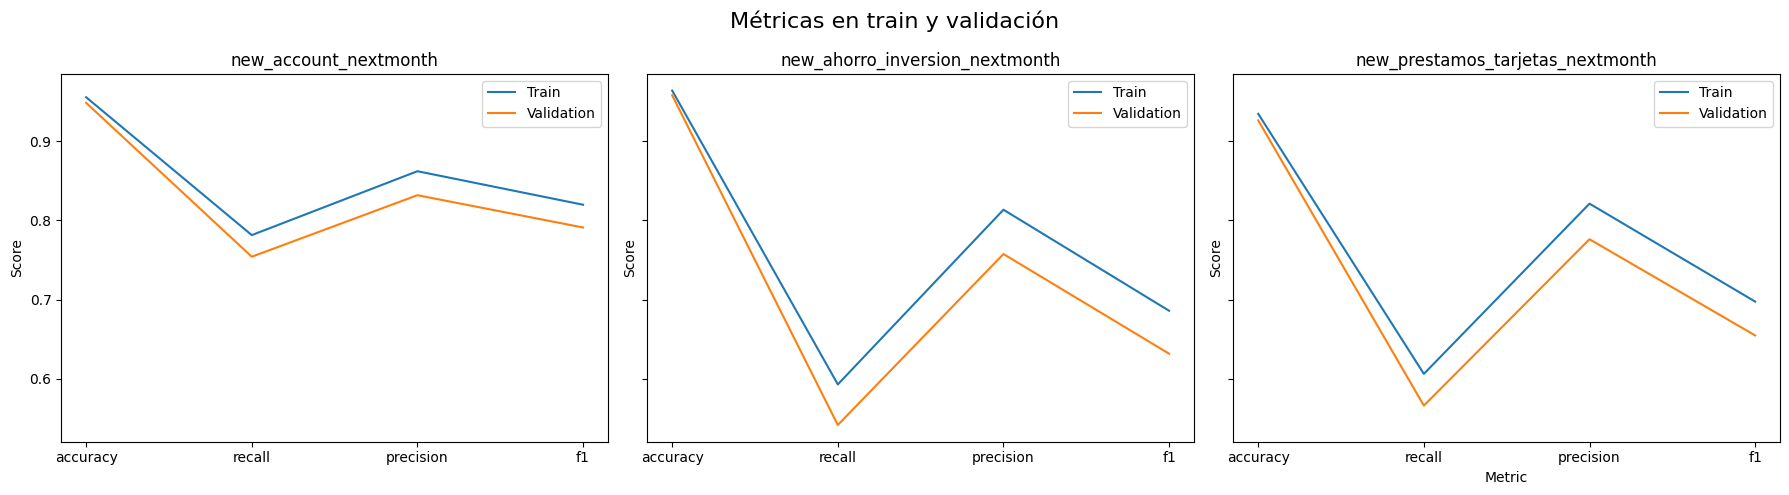

In [ ]:
# Create subplots for each target column
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle("Métricas en train y validación", fontsize=16)

# Iterate through target columns and plot metrics
for i, target_col in enumerate(target_columns):
  axes[i].plot(list(d_metrics.keys()), df_metrics_train[target_col], label='Train')
  axes[i].plot(list(d_metrics.keys()), df_metrics_val[target_col], label='Validation')
  axes[i].set_title(target_col)
  axes[i].set_ylabel("Score")
  axes[i].legend()

# Set x-axis label for the bottom subplot
axes[-1].set_xlabel("Metric")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Matriz de confusión

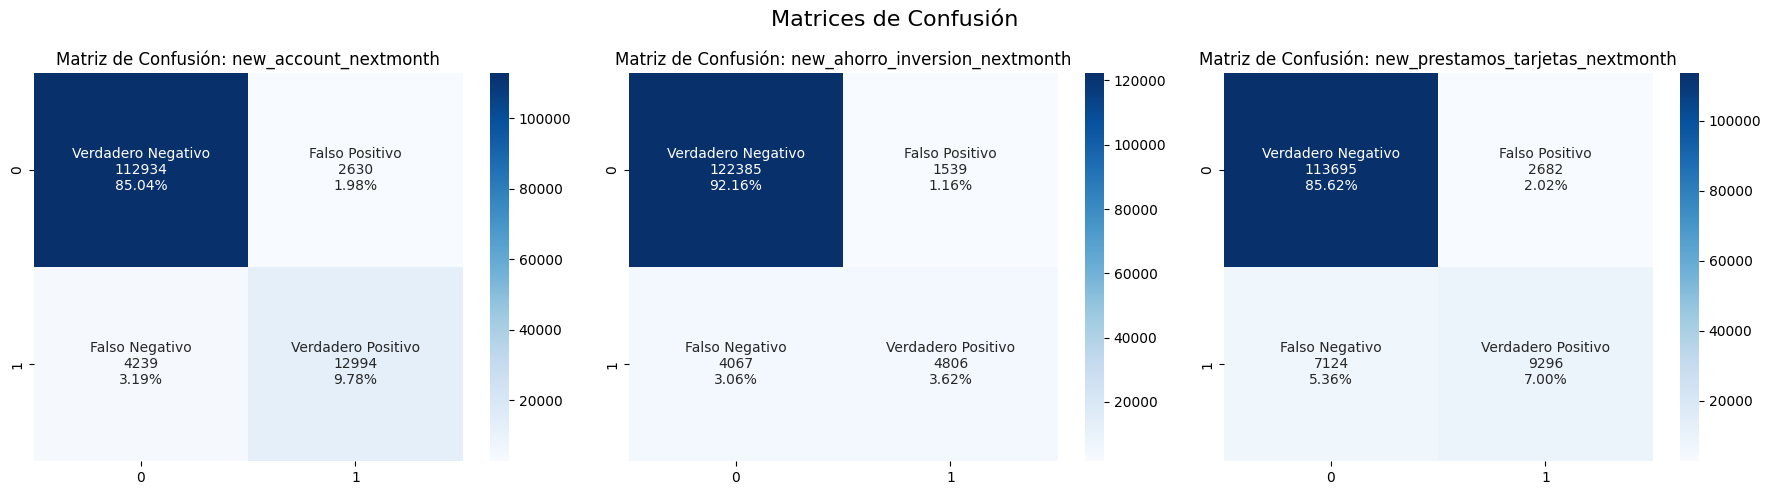

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics


def make_confusion_matrix(cm, ax):  # Modified function to accept an axes object
    """Plots the confusion matrix on a given axes object.

    Parameters:
    cm (2x2 numpy.ndarray): Confusion matrix.
    ax (matplotlib.axes.Axes): Axes object to plot on.

    Returns:
    None
    """
    group_names = ["Verdadero Negativo", "Falso Positivo", "Falso Negativo", "Verdadero Positivo"]
    group_counts = [value for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, fmt="", cmap='Blues', ax=ax)  # Plot on the given axes

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Matrices de Confusión", fontsize=16)

# Iterate through target columns
for i, target_col in enumerate(target_columns):
    # Calculate confusion matrix for the current target column
    cm_val = metrics.confusion_matrix(y_val.iloc[:, i], y_pred_val[:, i])

    # Plot confusion matrix using the modified function
    make_confusion_matrix(cm_val, axes[i])  # Pass the axes object
    axes[i].set_title(f"Matriz de Confusión: {target_col}")

plt.tight_layout()
plt.show()

Como ya se ha comentado, el grupo de verdaderos negativos es mucho más mayoritario que los positivos, dando así a una accuracy excepcional, pero no es real sobre el rendimiento del modelo.

Los verdaderos positivos son mayores que los falsos positivos, dando lugar a una mayor precisión. Es decir, los clientes que el modelo predice como un sí de compra al mes que viene, una mayor parte sí que lo hace.

Sin embargo, los falsos negativos presentan una proporción considerable comparado con los verdaderos positivos, dando lugar así a un recall más bajo. Es decir, los clientes que van a adquirir un producto nuevo, el modelo no ha sido capaz de identificarlo.

## Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, auc
# Get probabilities for each target column
y_train_probs = xgb.predict_proba(X_train)
y_val_probs = xgb.predict_proba(X_val)

# Extract probabilities for the positive class (class 1)
y_train_probs = [y_train_probs[i][:, 1] for i in range(len(target_columns))]
y_val_probs = [y_val_probs[i][:, 1] for i in range(len(target_columns))]

# True labels for each target column
y_train_true = [y_train[col] for col in target_columns]
y_val_true = [y_val[col] for col in target_columns]

In [ ]:
plt.figure(figsize=(8, 6))

for i, col in enumerate(target_columns):
    # Calculate ROC curve
    fpr_train, tpr_train, _ = roc_curve(y_train_true[i], y_train_probs[i])
    fpr_val, tpr_val, _ = roc_curve(y_val_true[i], y_val_probs[i])
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_val = auc(fpr_val, tpr_val)

    # Plot ROC curve
    plt.plot(fpr_train, tpr_train, label=f'{col} (Train) (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_val, tpr_val, label=f'{col} (Validation) (AUC = {roc_auc_val:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

La curva ROC muestra resultados bastantes altos por lo comentado anteriormente, tenemos clases desbalanceadas donde predomina un valor sobre otro, así que un ROC AUC alto no indica el rendimiento real del modelo.

## Capacidad discriminativa del modelo

Para asegurarnos que la probabilidad que da el modelo se corresponde efectivamente con una probabilidad fiable, comparamos la probabilidad predicha con los datos reales.

También trazamos la curva de calibración mediante `calibration_curve`.

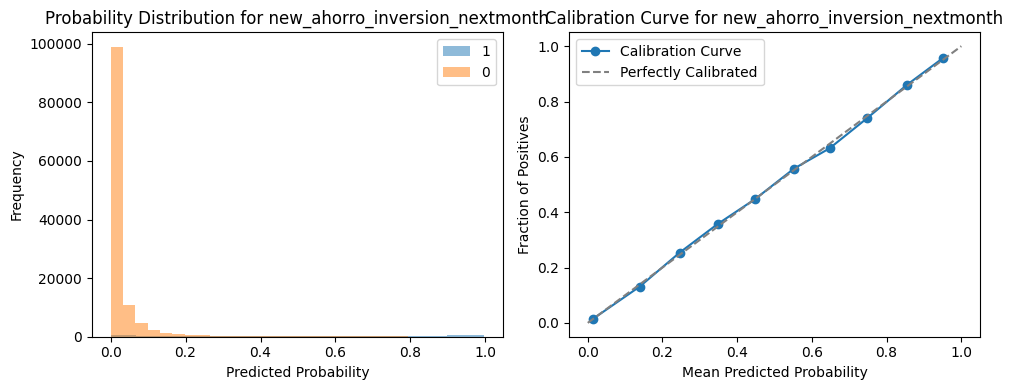

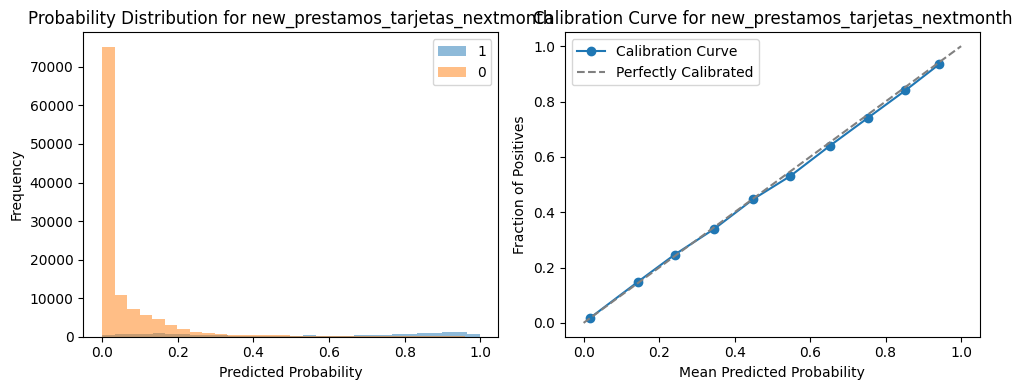

In [ ]:
from sklearn.calibration import calibration_curve

for i, target_col in enumerate(target_columns):
    # Get predicted probabilities for the current target column
    y_prob = xgb.predict_proba(X_val)[i][:, 1]  # Probability of class 1

    # Get true labels for the current target column
    y_test = y_val[target_col]

    # Calculate calibration curve
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

    # Create a 1x2 subplot
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Plot probability distribution on the first subplot
    axes[0].hist(y_prob[y_test == 1], bins=30, alpha=0.5, label='1')
    axes[0].hist(y_prob[y_test == 0], bins=30, alpha=0.5, label='0')
    axes[0].set_title(f'Probability Distribution for {target_col}')
    axes[0].set_xlabel('Predicted Probability')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()

    # Plot calibration curve on the second subplot
    axes[1].plot(prob_pred, prob_true, marker='o', label='Calibration Curve')
    axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
    axes[1].set_title(f'Calibration Curve for {target_col}')
    axes[1].set_xlabel('Mean Predicted Probability')
    axes[1].set_ylabel('Fraction of Positives')
    axes[1].legend()

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

La curva de calibración está muy alineada con la curva ideal, lo que indica que el modelo está bien calibrado.

Aunque la clase de los positivos son minoritarios, se puede observar que el modelo asigna una probabilidad más alta a la clase positiva y una probabilidad cercana a cero a la clase negativa. Quiere decir que el modelo es capaz de discriminar bien las clases.

## Predicción de probalidades en test

In [ ]:
#Get probability predictions
probs = xgb.predict_proba(X_test)
proba_dict = {col: probs[i][:, 1] for i, col in enumerate(target_columns)}
proba_df = pd.DataFrame(proba_dict, index=df_test.index)

In [ ]:
df_probs=pd.concat([id_test,proba_df],axis=1)
df_probs

pk_cid  new_account_nextmonth  new_ahorro_inversion_nextmonth  \
8          16063               0.164342                        0.001381   
14         16203               0.143242                        0.012137   
23         16502               0.035605                        0.026429   
51         17590               0.095554                        0.021802   
68         17799               0.026540                        0.029192   
...          ...                    ...                             ...   
5950045  1553685               0.378705                        0.042953   
5950046  1553686               0.724154                        0.006940   
5950047  1553687               0.216656                        0.000839   
5950048  1553688               0.532544                        0.027295   
5950049  1553689               0.693516                        0.030544   

         new_prestamos_tarjetas_nextmonth  
8                                0.015131  
14                               0.047888  
23                               0.126816  
51                               0.113219  
68                               0.136668  
...                                   ...  
5950045                          0.008228  
5950046                          0.008167  
5950047                          0.002238  
5950048                          0.012236  
5950049                          0.014040  

[429668 rows x 4 columns]

In [ ]:
#Columna nueva sobre la posible rentabilidad del cliente
df_probs['Rentabilidad']=df_probs['new_account_nextmonth']*10+\
            df_probs['new_ahorro_inversion_nextmonth']*40+\
            df_probs['new_prestamos_tarjetas_nextmonth']*60

#Columna sobre el producto recomendado, equivalente al nombre de la columna del valor maximo
df_probs['Recomendado']=df_probs[target_columns].idxmax(axis=1)
df_probs

pk_cid  new_account_nextmonth  new_ahorro_inversion_nextmonth  \
8          16063               0.164342                        0.001381   
14         16203               0.143242                        0.012137   
23         16502               0.035605                        0.026429   
51         17590               0.095554                        0.021802   
68         17799               0.026540                        0.029192   
...          ...                    ...                             ...   
5950045  1553685               0.378705                        0.042953   
5950046  1553686               0.724154                        0.006940   
5950047  1553687               0.216656                        0.000839   
5950048  1553688               0.532544                        0.027295   
5950049  1553689               0.693516                        0.030544   

         new_prestamos_tarjetas_nextmonth  Rentabilidad  \
8                                0.015131      2.606477   
14                               0.047888      4.791174   
23                               0.126816      9.022176   
51                               0.113219      8.620744   
68                               0.136668      9.633176   
...                                   ...           ...   
5950045                          0.008228      5.998844   
5950046                          0.008167      8.009140   
5950047                          0.002238      2.334366   
5950048                          0.012236      7.151408   
5950049                          0.014040      8.999328   

                              Recomendado  
8                   new_account_nextmonth  
14                  new_account_nextmonth  
23       new_prestamos_tarjetas_nextmonth  
51       new_prestamos_tarjetas_nextmonth  
68       new_prestamos_tarjetas_nextmonth  
...                                   ...  
5950045             new_account_nextmonth  
5950046             new_account_nextmonth  
5950047             new_account_nextmonth  
5950048             new_account_nextmonth  
5950049             new_account_nextmonth  

[429668 rows x 6 columns]

In [ ]:
df_recomendado=df_probs.sort_values(by='Rentabilidad',ascending=False)[:10000]
df_recomendado

pk_cid  new_account_nextmonth  new_ahorro_inversion_nextmonth  \
4866192  1388319               0.912480                        0.917205   
42913     762486               0.732833                        0.882906   
1588765  1122437               0.925454                        0.968641   
1712357  1138300               0.691790                        0.612079   
96906    1004255               0.888487                        0.971119   
...          ...                    ...                             ...   
4578799  1361426               0.007408                        0.037085   
2239442  1177629               0.004380                        0.045467   
5891174  1526045               0.739970                        0.659637   
4348971  1343541               0.211565                        0.253224   
2599223  1202701               0.557547                        0.596646   

         new_prestamos_tarjetas_nextmonth  Rentabilidad  \
4866192                          0.774099     92.258949   
42913                            0.784205     89.696899   
1588765                          0.666849     88.011154   
1712357                          0.924596     86.876823   
96906                            0.633132     85.717529   
...                                   ...           ...   
4578799                          0.679687     42.338680   
2239442                          0.674588     42.337757   
5891174                          0.142404     42.329456   
4348971                          0.501403     42.328781   
2599223                          0.214773     42.327663   

                              Recomendado  
4866192    new_ahorro_inversion_nextmonth  
42913      new_ahorro_inversion_nextmonth  
1588765    new_ahorro_inversion_nextmonth  
1712357  new_prestamos_tarjetas_nextmonth  
96906      new_ahorro_inversion_nextmonth  
...                                   ...  
4578799  new_prestamos_tarjetas_nextmonth  
2239442  new_prestamos_tarjetas_nextmonth  
5891174             new_account_nextmonth  
4348971  new_prestamos_tarjetas_nextmonth  
2599223    new_ahorro_inversion_nextmonth  

[10000 rows x 6 columns]

In [ ]:
# #Guardar los clientes a los que decidimos enviar recomendación
# df_probs.to_pickle('/content/drive/MyDrive/Colab Notebooks/Proyecto_Final/df_probs.pkl')
# df_recomendado.to_pickle('/content/drive/MyDrive/Colab Notebooks/Proyecto_Final/df_recomendado.pkl')

### Análisis de los clientes seleccionados

In [ ]:
#Incluir más columnas, para analizar los clientes propuestos por el modelo
df_recomendado=pd.merge(df_recomendado,
            df_test[['pk_cid','active_customer','hdbscan_cluster','age','gender','salary','segment','antigüedad_cliente']],
            on='pk_cid',how='left')
df_recomendado

pk_cid  new_account_nextmonth  new_ahorro_inversion_nextmonth  \
0     1388319               0.912480                        0.917205   
1      762486               0.732833                        0.882906   
2     1122437               0.925454                        0.968641   
3     1138300               0.691790                        0.612079   
4     1004255               0.888487                        0.971119   
...       ...                    ...                             ...   
9995  1361426               0.007408                        0.037085   
9996  1177629               0.004380                        0.045467   
9997  1526045               0.739970                        0.659637   
9998  1343541               0.211565                        0.253224   
9999  1202701               0.557547                        0.596646   

      new_prestamos_tarjetas_nextmonth  Rentabilidad  \
0                             0.774099     92.258949   
1                             0.784205     89.696899   
2                             0.666849     88.011154   
3                             0.924596     86.876823   
4                             0.633132     85.717529   
...                                ...           ...   
9995                          0.679687     42.338680   
9996                          0.674588     42.337757   
9997                          0.142404     42.329456   
9998                          0.501403     42.328781   
9999                          0.214773     42.327663   

                           Recomendado  active_customer  hdbscan_cluster  age  \
0       new_ahorro_inversion_nextmonth                1              0.0   53   
1       new_ahorro_inversion_nextmonth                1             -1.0   54   
2       new_ahorro_inversion_nextmonth                1              0.0   39   
3     new_prestamos_tarjetas_nextmonth                1             -1.0   55   
4       new_ahorro_inversion_nextmonth                1              0.0   37   
...                                ...              ...              ...  ...   
9995  new_prestamos_tarjetas_nextmonth                1              6.0   26   
9996  new_prestamos_tarjetas_nextmonth                1              6.0   23   
9997             new_account_nextmonth                1              5.0   43   
9998  new_prestamos_tarjetas_nextmonth                1              0.0   62   
9999    new_ahorro_inversion_nextmonth                1              6.0   23   

      gender  salary             segment  antigüedad_cliente  
0          0  134865   02 - PARTICULARES                 436  
1          1   42046   02 - PARTICULARES                1416  
2          1   84964   02 - PARTICULARES                1192  
3          1  212071   02 - PARTICULARES                1068  
4          0   97297   02 - PARTICULARES                1572  
...      ...     ...                 ...                 ...  
9995       1   99050  03 - UNIVERSITARIO                 548  
9996       1  102557  03 - UNIVERSITARIO                 983  
9997       0   88654   02 - PARTICULARES                 128  
9998       0  247546            01 - TOP                 576  
9999       1  131774  03 - UNIVERSITARIO                 952  

[10000 rows x 13 columns]

In [ ]:
df_recomendado.describe(include='all').T

count   unique  \
pk_cid                            10000.0  10000.0   
new_account_nextmonth             10000.0      NaN   
new_ahorro_inversion_nextmonth    10000.0      NaN   
new_prestamos_tarjetas_nextmonth  10000.0      NaN   
Rentabilidad                      10000.0      NaN   
Recomendado                         10000        3   
active_customer                   10000.0      NaN   
hdbscan_cluster                   10000.0      NaN   
age                               10000.0      NaN   
gender                            10000.0      NaN   
salary                            10000.0      NaN   
segment                             10000        4   
antigüedad_cliente                10000.0      NaN   

                                                               top  freq  \
pk_cid                                                    159282.0   1.0   
new_account_nextmonth                                          NaN   NaN   
new_ahorro_inversion_nextmonth                                 NaN   NaN   
new_prestamos_tarjetas_nextmonth                               NaN   NaN   
Rentabilidad                                                   NaN   NaN   
Recomendado                       new_prestamos_tarjetas_nextmonth  7768   
active_customer                                                NaN   NaN   
hdbscan_cluster                                                NaN   NaN   
age                                                            NaN   NaN   
gender                                                         NaN   NaN   
salary                                                         NaN   NaN   
segment                                          02 - PARTICULARES  6354   
antigüedad_cliente                                             NaN   NaN   

                                         mean           std        min  \
pk_cid                                    NaN           NaN        NaN   
new_account_nextmonth                0.200452      0.283871   0.000255   
new_ahorro_inversion_nextmonth       0.179446       0.28961   0.000345   
new_prestamos_tarjetas_nextmonth     0.716021      0.250516   0.000358   
Rentabilidad                        52.143608       5.45546  42.327663   
Recomendado                               NaN           NaN        NaN   
active_customer                        0.9947      0.072612        0.0   
hdbscan_cluster                        1.1368      2.337013       -1.0   
age                                   37.9189     11.978901       20.0   
gender                                 0.4288      0.494929        0.0   
salary                            115555.4989  88684.808066     5163.0   
segment                                   NaN           NaN        NaN   
antigüedad_cliente                   907.1086     414.39912        8.0   

                                        25%        50%        75%        max  
pk_cid                                  NaN        NaN        NaN        NaN  
new_account_nextmonth              0.015752    0.04544   0.332375   0.993508  
new_ahorro_inversion_nextmonth     0.006451   0.014746   0.321752   0.995567  
new_prestamos_tarjetas_nextmonth   0.615539   0.807801   0.894862   0.997396  
Rentabilidad                      48.119605  52.227825  55.793149  92.258949  
Recomendado                             NaN        NaN        NaN        NaN  
active_customer                         1.0        1.0        1.0        1.0  
hdbscan_cluster                         0.0        0.0        0.0        6.0  
age                                    29.0       36.0       45.0      102.0  
gender                                  0.0        0.0        1.0        1.0  
salary                              71281.0    88654.0   129787.5   999927.0  
segment                                 NaN        NaN        NaN        NaN  
antigüedad_cliente                    591.0      924.0    1290.25     1607.0

In [ ]:
df_recomendado.Recomendado.value_counts()

Recomendado
new_prestamos_tarjetas_nextmonth    7768
new_account_nextmonth               1164
new_ahorro_inversion_nextmonth      1068
Name: count, dtype: int64

El producto mayoritariamente recomendado es de tipo tarjeta, ya que este daba mayor ganancia, y al calcular la rentabilidad este aporta mayor peso.

In [ ]:
df_recomendado.active_customer.value_counts(normalize=True)

active_customer
1    0.9947
0    0.0053
Name: proportion, dtype: float64

In [ ]:
df_recomendado[df_recomendado['active_customer']==0].Recomendado.value_counts()

Recomendado
new_prestamos_tarjetas_nextmonth    52
new_ahorro_inversion_nextmonth       1
Name: count, dtype: int64

Aunque la mayoría son clientes activos, el modelo prevé algunos clientes inactivos (53 individuos) con posibilidad de volver, y comprarían productos de préstamos/tarjetas.

Puesto que el modelo daba bastante importance al grupo que pertenece el cliente, visualizamos las distribuciones en estas:

In [ ]:
#Distribucion de cluster
display(df_recomendado.hdbscan_cluster.value_counts(normalize=True))
sns.histplot(data=df_recomendado,x='hdbscan_cluster',hue='Recomendado',bins=30,kde=True)

hdbscan_cluster
 0.0    0.6494
 5.0    0.1321
-1.0    0.1042
 6.0    0.0915
 1.0    0.0157
 2.0    0.0058
 3.0    0.0010
 4.0    0.0003
Name: proportion, dtype: float64

<Axes: xlabel='hdbscan_cluster', ylabel='Count'>

Nuestros clientes objetivo se corresponde en su mayoría al cluster 0, según nuestra definición del cluster, este grupo contiene clientes fieles, con mayor número de productos. Después está el cluster 5 que incluye a clientes varones más recientes, el cluster -1, compuesto por clientes fieles con un número considerable de productos y que no encajaban en otro cluster específico por su alto salario. El cluster 6 compone únicamente a mujeres jóvenes.

In [ ]:
#Distribución de segmento
display(df_recomendado.segment.value_counts(normalize=True))
sns.histplot(data=df_recomendado,x='segment',hue='Recomendado',bins=30,kde=True)

segment
02 - PARTICULARES     0.6354
03 - UNIVERSITARIO    0.2983
01 - TOP              0.0643
Unknown               0.0020
Name: proportion, dtype: float64

<Axes: xlabel='segment', ylabel='Count'>

El segmento de los particulares es el que nos interesa más en esta campaña, con preferencia de vender productos de tarjetas o productos de cuentas.



In [ ]:
df_recomendado.gender.value_counts(normalize=True)

gender
0    0.5712
1    0.4288
Name: proportion, dtype: float64

Por sexo predominan los hombres, supera la proporción a las mujeres en un 15%.

In [ ]:
sns.violinplot(data=df_recomendado,y='Recomendado',x='age')

<Axes: xlabel='age', ylabel='Recomendado'>

La edad media de los clientes es parecida en los tres productos, las tarjetas tiene una distribución con un rango más amplio.

# ROI estimado

Calculamos tasa de respuestas estimada y el ROI.

In [ ]:
# Calcular probabilidades promedio de compra para cada producto
prob_cuenta = df_recomendado[df_recomendado['Recomendado']=='new_account_nextmonth']['new_account_nextmonth'].mean()
prob_ahorro = df_recomendado[df_recomendado['Recomendado']=='new_ahorro_inversion_nextmonth']['new_ahorro_inversion_nextmonth'].mean()
prob_prestamo = df_recomendado[df_recomendado['Recomendado']=='new_prestamos_tarjetas_nextmonth']['new_prestamos_tarjetas_nextmonth'].mean()
print(f'Probabilidad de compra de cuentas: {prob_cuenta:.2%}')
print(f'Probabilidad de compra de ahorros: {prob_ahorro:.2%}')
print(f'Probabilidad de compra de prestamos: {prob_prestamo:.2%}')

# Estimar la cantidad de clientes que responderan para cada producto
responden_cuenta = prob_cuenta * df_recomendado['Recomendado'].value_counts()['new_account_nextmonth']
responden_ahorro = prob_ahorro * df_recomendado['Recomendado'].value_counts()['new_ahorro_inversion_nextmonth']
responden_prestamo = prob_prestamo * df_recomendado['Recomendado'].value_counts()['new_prestamos_tarjetas_nextmonth']

# Calcular la tasa de respuesta estimada total
tasa_respuesta_estimada = (responden_cuenta + responden_ahorro + responden_prestamo) / 10000
print(f"Tasa de respuesta estimada: {tasa_respuesta_estimada:.2%}")

Probabilidad de compra de cuentas: 71.36%
Probabilidad de compra de ahorros: 75.61%
Probabilidad de compra de prestamos: 83.50%
Tasa de respuesta estimada: 81.25%


La tasa de respuesta estimada es del 81%, equivalente a unos ocho mil usuarios con posibilidad de compra.


In [ ]:
# Calcular la rentabilidad estimada para cada producto
rentabilidad_cuenta = responden_cuenta * 10
rentabilidad_ahorro = responden_ahorro * 40
rentabilidad_prestamo = responden_prestamo * 60

# Calcular la rentabilidad total estimada
rentabilidad_total = rentabilidad_cuenta + rentabilidad_ahorro + rentabilidad_prestamo

print(f"Rentabilidad estimada: {rentabilidad_total:.2f}€")

Rentabilidad estimada: 429794.04€


Para calcular el ROI, necesitamos saber el coste de la campaña. Por ejemplo, si suponemos un coste de 10000€:

In [ ]:
coste_campaña = 10000 #Valor ficticio
roi_estimado = (rentabilidad_total - coste_campaña)/ coste_campaña
print(f"ROI estimado: {roi_estimado:.2%}")

ROI estimado: 4197.94%


# Guardar CSV

El equipo nos indica que la plataforma para el envío sólo admiten ficheros con un campo
para el id_user y otro campo con la etiqueta cluster.

In [ ]:
df_envio=df_recomendado[['pk_cid','hdbscan_cluster']]
df_envio.reset_index(drop=True,inplace=True)
df_envio

pk_cid  hdbscan_cluster
0     1388319              0.0
1      762486             -1.0
2     1122437              0.0
3     1138300             -1.0
4     1004255              0.0
...       ...              ...
9995  1361426              6.0
9996  1177629              6.0
9997  1526045              5.0
9998  1343541              0.0
9999  1202701              6.0

[10000 rows x 2 columns]

In [ ]:
# #Guardar csv
# df_envio.to_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto_Final/df_envio.csv')